In [1]:
import json
rebins=['onebin','rebin5','rebin10','rebin','']
bins=[1,5,10,25,50]
fdict={}
for r in rebins:
    fdict[r]=json.load(open(f"cards/2018_cluster_2018/hc_emu_SR2_LM_SR_HM_1D_13TeV_impact_mu1_{r}.json"))


In [4]:
nui_list=['CMS_UES_2018_13TeV','CMS_JER_2018_13TeV','CMS_JES_EC2_2018_13TeV',
          'CMS_JES_HF_13TeV','CMS_JES_BBEC1_2018_13TeV','CMS_JES_RelativeBal_13TeV',
         'CMS_JES_FlavorQCD_13TeV','CMS_JES_BBEC1_13TeV','CMS_JES_Absolute_13TeV','CMS_JES_Absolute_2018_13TeV']

In [5]:
collect={}
import numpy as np
for j,r in enumerate(fdict.keys()):
    print(j,r)
    unc_dict={}
    impact_dict={}
    
    for i in range(len(fdict['']['params'])):
    
        if fdict['']['params'][i]['name'] in nui_list:
            unc_dict[fdict[r]['params'][i]['name']]=np.array(fdict[r]['params'][i]['fit'])/np.array(fdict[r]['params'][i]['prefit'])
            impact_dict[fdict[r]['params'][i]['name']]=fdict[r]['params'][i]['impact_r']
            # print(fdict[r]['params'][i])
    collect[bins[j]]={"unc":unc_dict,"impact":impact_dict}

0 onebin
1 rebin5
2 rebin10
3 rebin
4 


/tmp/ipykernel_55256/798610129.py:11: RuntimeWarning: invalid value encountered in divide
  unc_dict[fdict[r]['params'][i]['name']]=np.array(fdict[r]['params'][i]['fit'])/np.array(fdict[r]['params'][i]['prefit'])


In [6]:
nui_list=nui_list[::-1] 

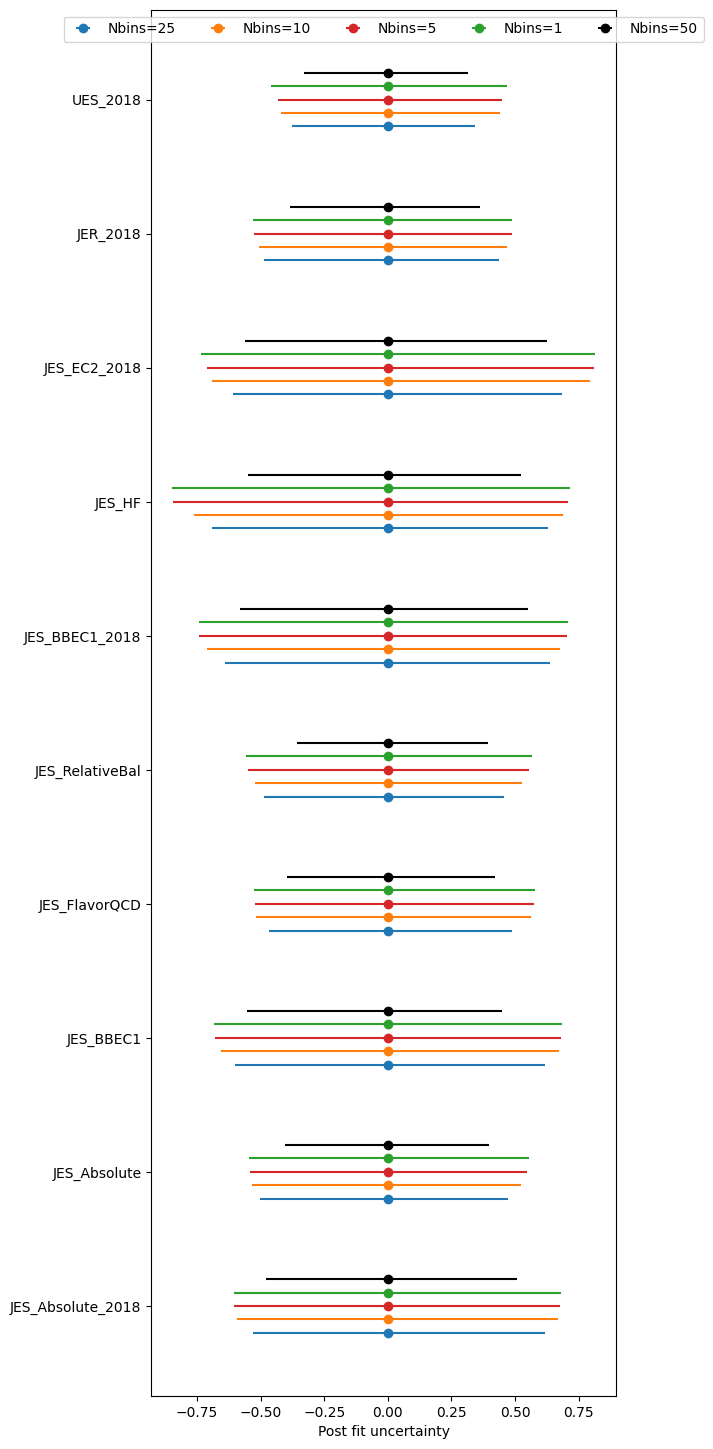

In [11]:
import matplotlib.pyplot as plt
colors=['tab:blue','tab:orange','tab:red','tab:green','black']
fig,ax=plt.subplots(figsize=(6,18))
import matplotlib.pyplot as plt
labels=[]
for i,b in enumerate([25,10,5,1,50]):
    # plt.errorbar(np.ones_like(nui_list),[i for i in range(len(nui_list))])
    # print(len())
    if i==2:labels=[r*5+i*0.5 for r in range(10)]
    # if b==50:lab="50(default)"
    ax.errorbar(np.zeros(10),[r*5+i*0.5 for r in range(10)],xerr=[[collect[b]['unc'][err][0] for err in nui_list],[collect[b]['unc'][err][2] for err in nui_list]],label=f'Nbins={b}',fmt='o',color=colors[i])
import matplotlib.ticker as ticker
ax.yaxis.set_minor_locator(ticker.NullLocator())
ax.yaxis.set_major_locator(ticker.FixedLocator(labels))
ax.set_yticklabels([err.replace("CMS_","").replace("_13TeV","") for err in nui_list])
# ax.set_yticklabels([f"N bins={cat}" for cat in [1,5,10,25] ])
ax.set_xlabel("Post fit uncertainty")
ax.legend(ncols=5,loc='upper center')

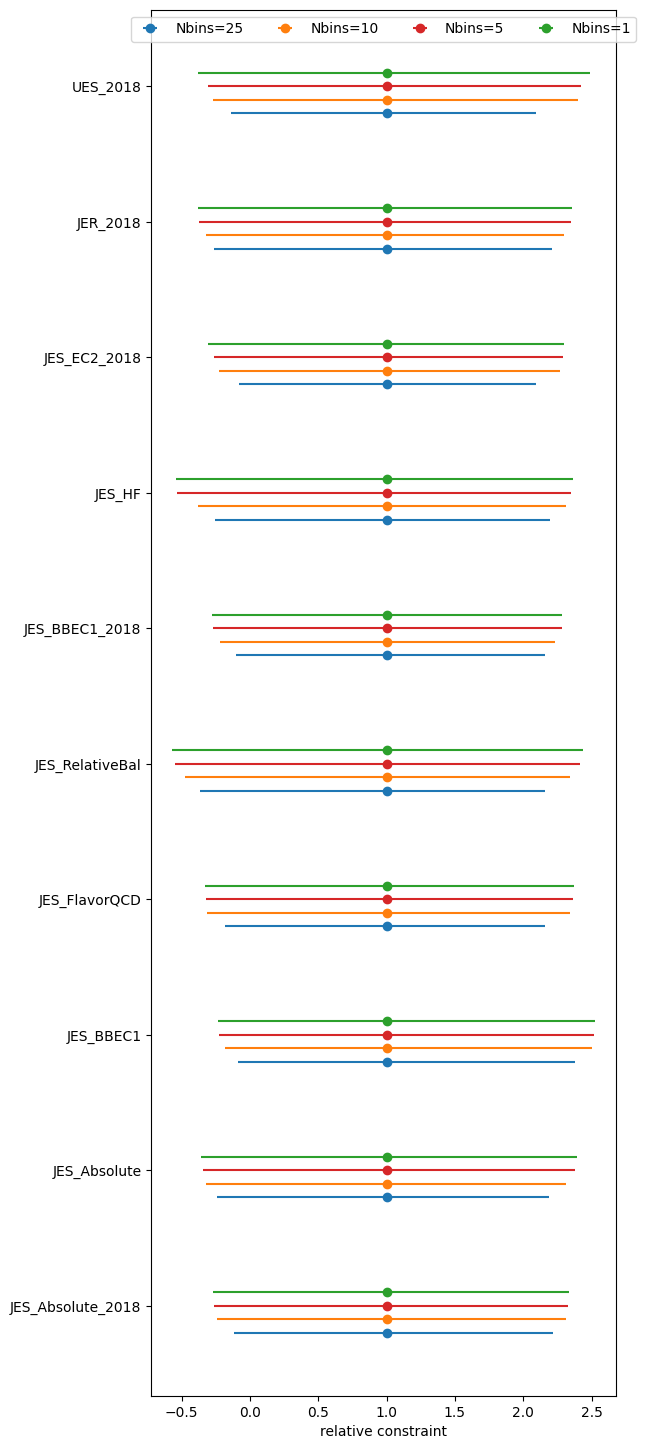

In [10]:
colors=['tab:blue','tab:orange','tab:red','tab:green','black']
fig,ax=plt.subplots(figsize=(6,18))
import matplotlib.pyplot as plt
labels=[]
for i,b in enumerate([25,10,5,1]):
    # plt.errorbar(np.ones_like(nui_list),[i for i in range(len(nui_list))])
    # print(len())
    if i==2:labels=[r*5+i*0.5 for r in range(10)]
    # if b==50:lab="50(default)"
    ax.errorbar(np.ones(10),[r*5+i*0.5 for r in range(10)],xerr=[[collect[b]['unc'][err][0]/collect[50]['unc'][err][0] for err in nui_list],[collect[b]['unc'][err][2]/collect[50]['unc'][err][2] for err in nui_list]],label=f'Nbins={b}',fmt='o',color=colors[i])
import matplotlib.ticker as ticker
ax.yaxis.set_minor_locator(ticker.NullLocator())
ax.yaxis.set_major_locator(ticker.FixedLocator(labels))
ax.set_yticklabels([err.replace("CMS_","").replace("_13TeV","") for err in nui_list])
# ax.set_yticklabels([f"N bins={cat}" for cat in [1,5,10,25] ])
ax.set_xlabel("relative constraint")
ax.legend(ncols=4,loc='upper center')

In [30]:
import uproot
limits={}
for i,r in enumerate(rebins):
    f=uproot.open(f"cards/2018_cluster_2018/higgsCombinehc_emu_SR2_LM_SR_HM_1D_13TeV{r}.AsymptoticLimits.mH125.root")
    limits[bins[i]]=f['limit']['limit'].array()

Text(0, 0.5, 'Median limit / Nbins=50')

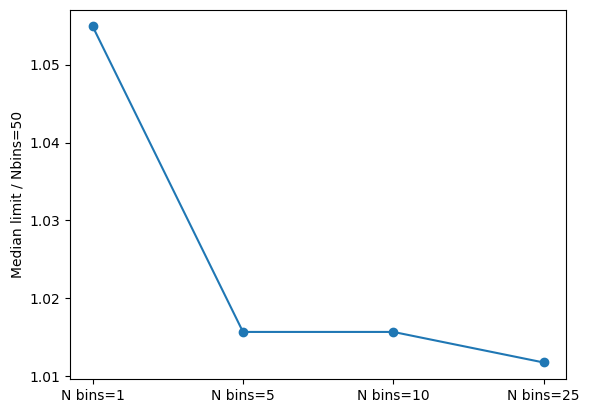

In [55]:
import matplotlib.pyplot as plt 
fig,ax=plt.subplots()
ax.plot(np.arange(1,5,1),[limits[i][2]/limits[50][2] for i in [1,5,10,25]],marker='o')
import matplotlib.ticker as ticker
ax.xaxis.set_minor_locator(ticker.NullLocator())
ax.xaxis.set_major_locator(ticker.FixedLocator([1,2,3,4]))
ax.set_xticklabels([f"N bins={cat}" for cat in [1,5,10,25] ])
ax.set_ylabel("Median limit / Nbins=50")

Text(0, 0.5, 'Median limit / Nbins=50')

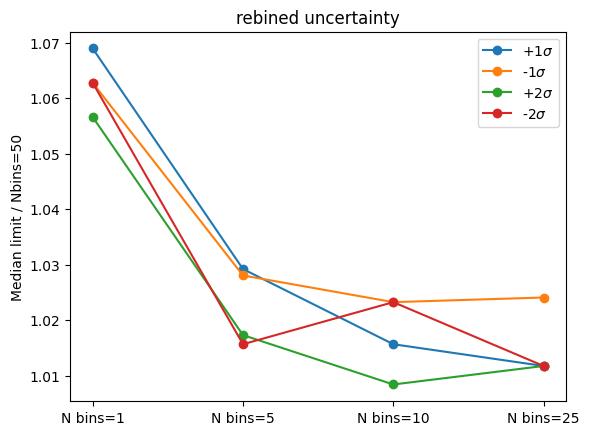

In [54]:
fig,ax=plt.subplots()
ax.set_title("rebined uncertainty")
ax.plot(np.arange(1,5,1),[(limits[i][3]-limits[i][2])/(limits[50][3]-limits[50][2]) for i in [1,5,10,25]],marker='o',label='+1$\\sigma$')
ax.plot(np.arange(1,5,1),[(limits[i][1]-limits[i][2])/(limits[50][1]-limits[50][2]) for i in [1,5,10,25]],marker='o',label='-1$\\sigma$')
ax.plot(np.arange(1,5,1),[(limits[i][4]-limits[i][2])/(limits[50][4]-limits[50][2]) for i in [1,5,10,25]],marker='o',label='+2$\\sigma$')
ax.plot(np.arange(1,5,1),[(limits[i][0]-limits[i][2])/(limits[50][0]-limits[50][2]) for i in [1,5,10,25]],marker='o',label='-2$\\sigma$')
ax.legend()
import matplotlib.ticker as ticker
ax.xaxis.set_minor_locator(ticker.NullLocator())
ax.xaxis.set_major_locator(ticker.FixedLocator([1,2,3,4]))
ax.set_xticklabels([f"N bins={cat}" for cat in [1,5,10,25] ])
ax.set_ylabel("Median limit / Nbins=50")
# ,
#              yerr=[[limits[i][1]/limits[50][1] for i in [1,5,10,25]],[limits[i][3]/limits[50][3] for i in [1,5,10,25]]],
#              fmt='o',color='k',lw=2)#,lc='g')

In [27]:
dir(hist.axes[0])

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_bases',
 '_concrete',
 '_cursor',
 '_deeply_writable',
 '_file',
 '_format0',
 '_format1',
 '_format_memberwise0',
 '_format_memberwise1',
 '_format_memberwise2',
 '_format_memberwise3',
 '_format_memberwise4',
 '_format_memberwise5',
 '_format_memberwise6',
 '_instance_version',
 '_is_memberwise',
 '_members',
 '_num_bytes',
 '_parent',
 '_serialize',
 '_to_writable',
 '_to_writable_postprocess',
 'all_members',
 'awkward_form',
 'base',
 'base_names_versions',
 'bases',
 'behaviors',
 'centers',
 'che

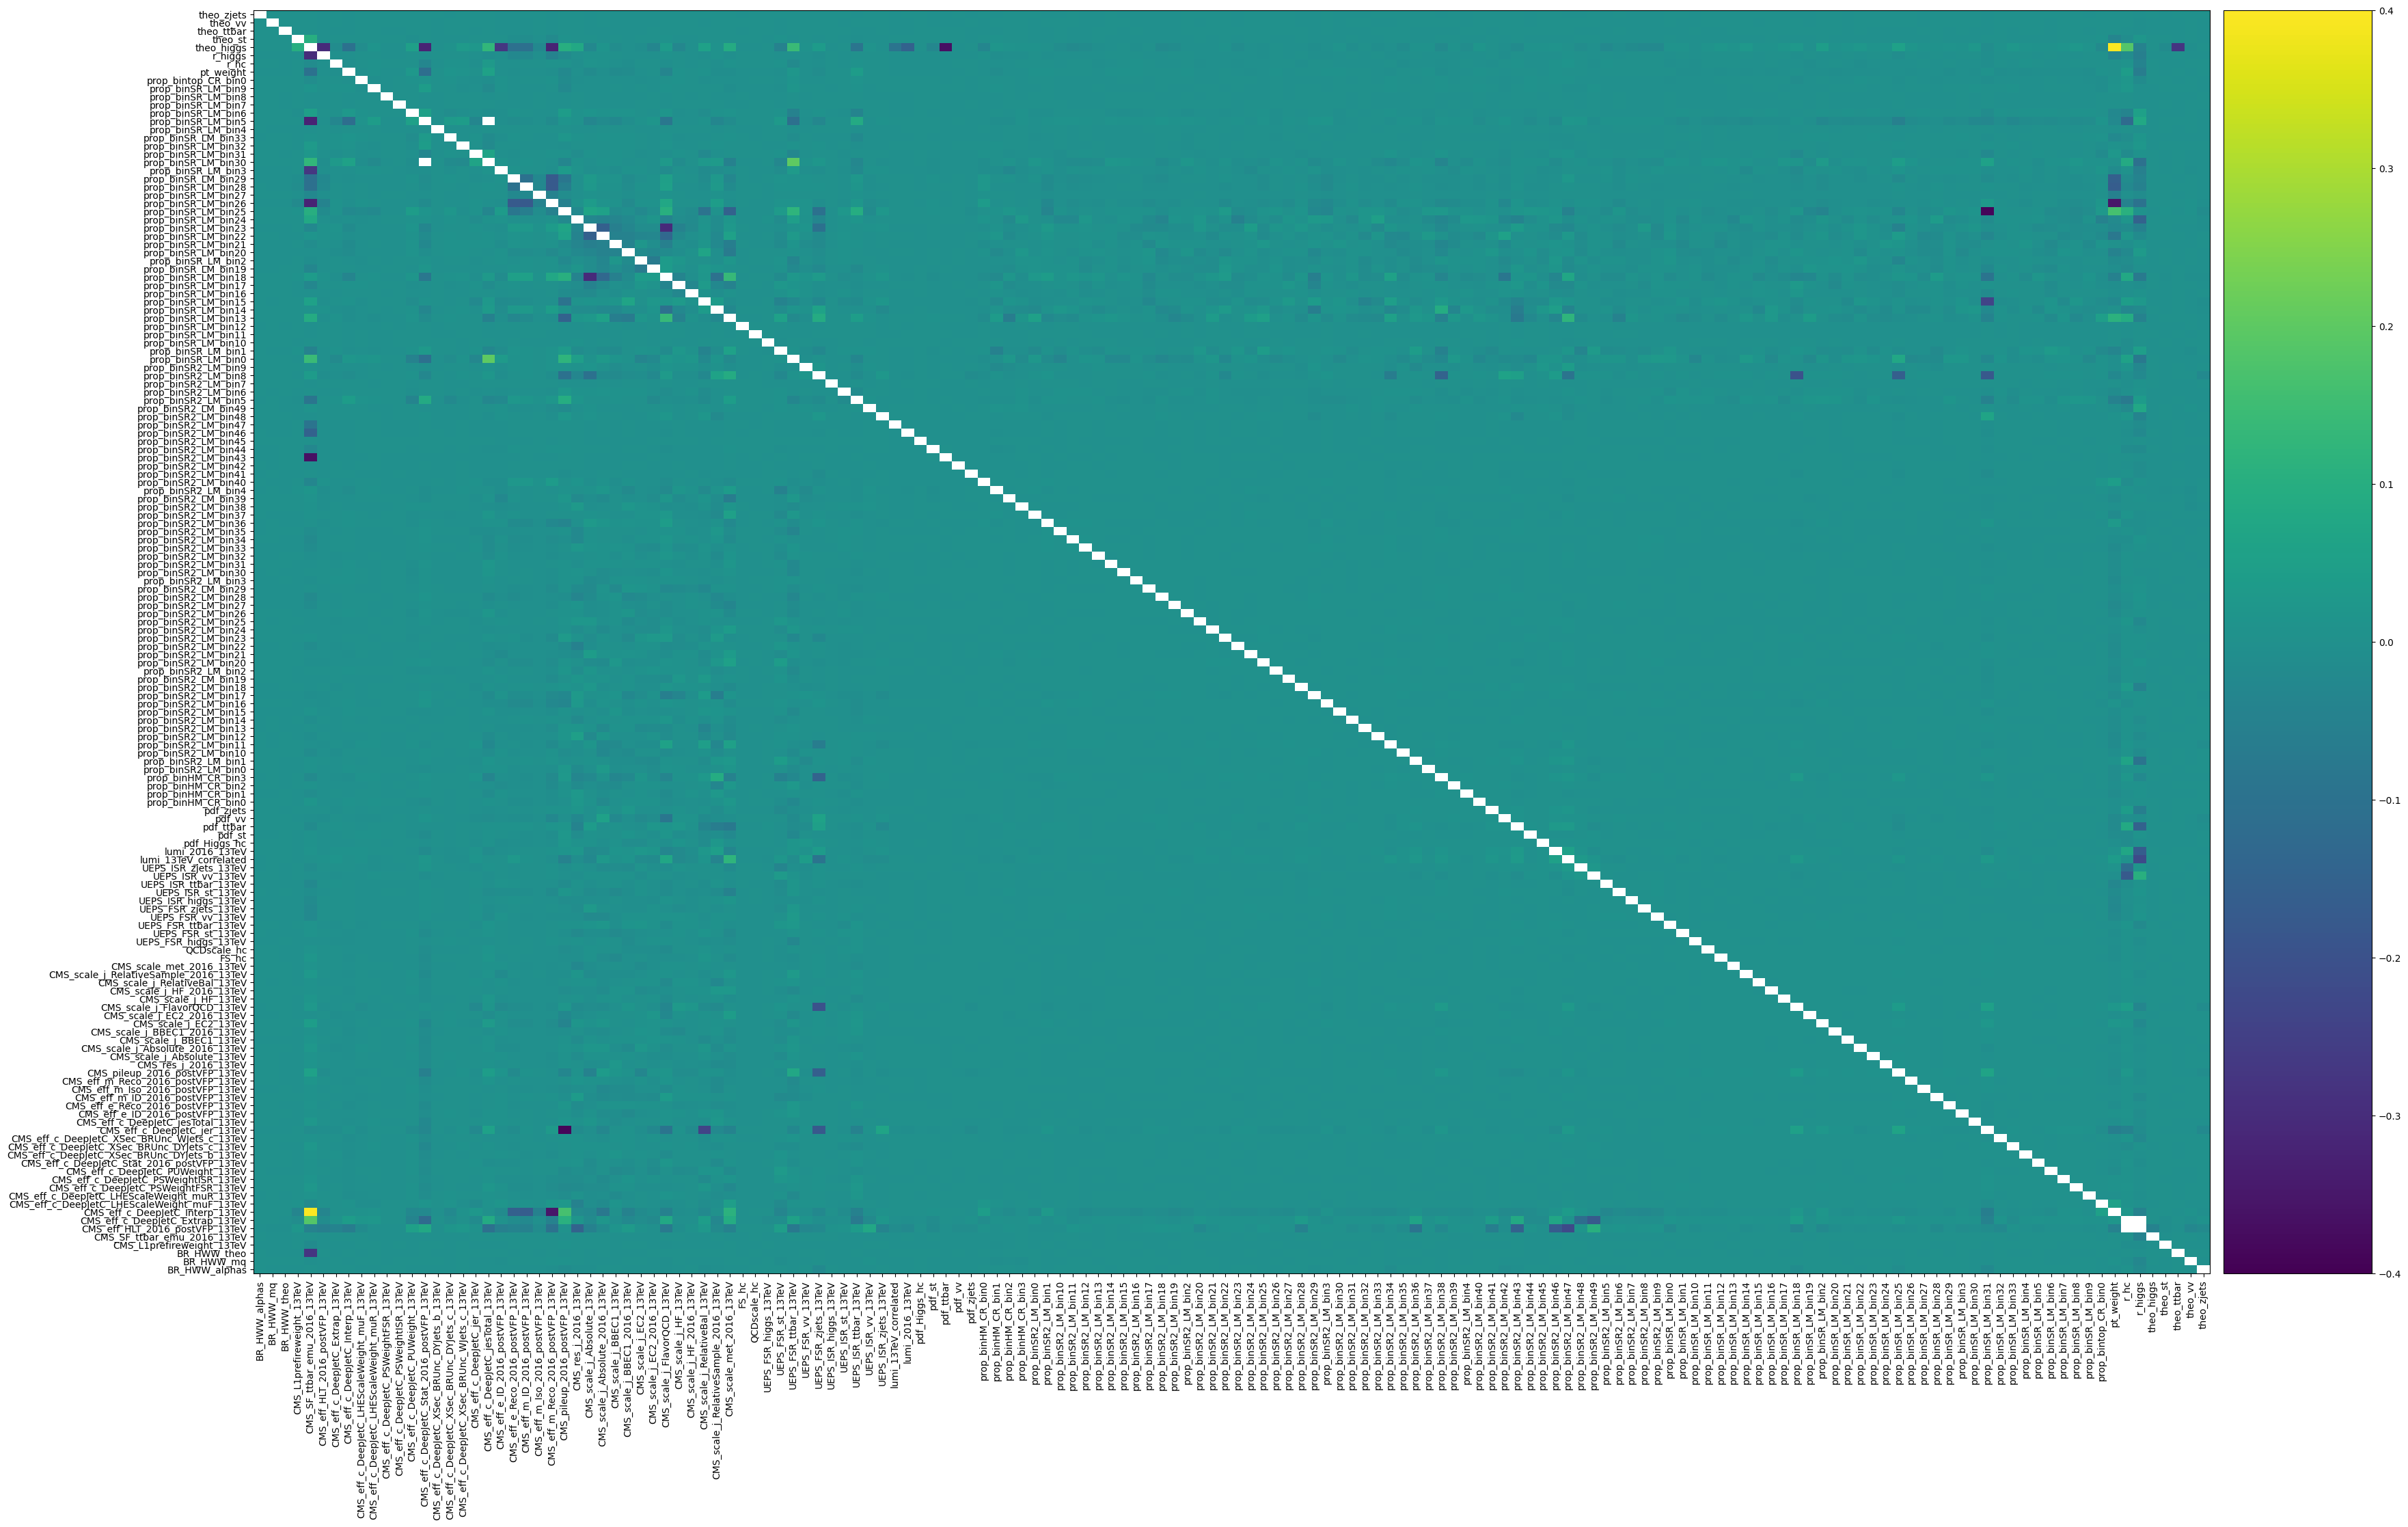

In [27]:
import mplhep 
import matplotlib.pyplot as plt
import uproot
f=uproot.open("cards/2016_postVFP_newCR_2016_postVFP//fitDiagnosticshc_emu_all_13TeV_twoPOI_mu1_.preFit.root")
# fitDiagnosticshc_emu_all1D_13TeV_mu1_
hist=f['covariance_fit_s']
plt.figure(figsize=(40,24))

mplhep.hist2dplot(hist,cmin=-0.4,cmax=0.4)
# plt.clim(-0.4,0.4)
# plt.xticks(rotation=90)
# plt.autofmt_xdate(rotation=45)
plt.tick_params(axis='x', labelrotation=90)
plt.savefig("2016_postVFP_corrmap.pdf")